In [1]:
from google.colab import files
uploaded = files.upload()

print("Files extracted!")


Saving archive (2).zip to archive (2).zip
Files extracted!


In [4]:
import pandas as pd
df = pd.read_csv('archive (2).zip')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
print(df.isnull().sum())
df = df.drop_duplicates()
df.fillna(df.mean(numeric_only=True), inplace=True)


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

# Encode the 'type' column (Movies / TV Shows) as Label
df['Label'] = le.fit_transform(df['type'])

# Drop the original text label column to avoid duplication
features = df.drop(['Label', 'type'], axis=1, errors='ignore')

# Keep only numeric columns for scaling
features = features.select_dtypes(include=['number'])

# Scale numeric features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


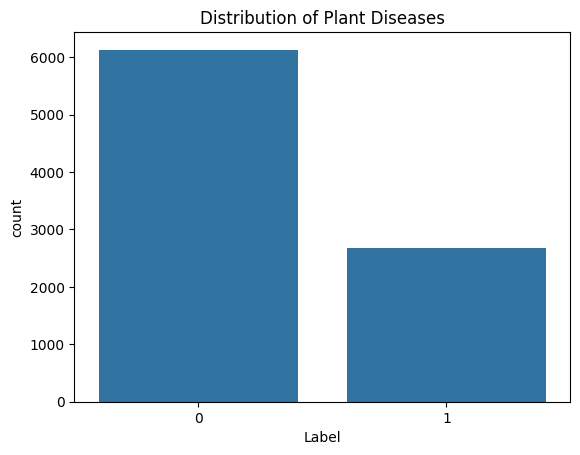

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Label', data=df)
plt.title('Distribution of Plant Diseases')
plt.show()

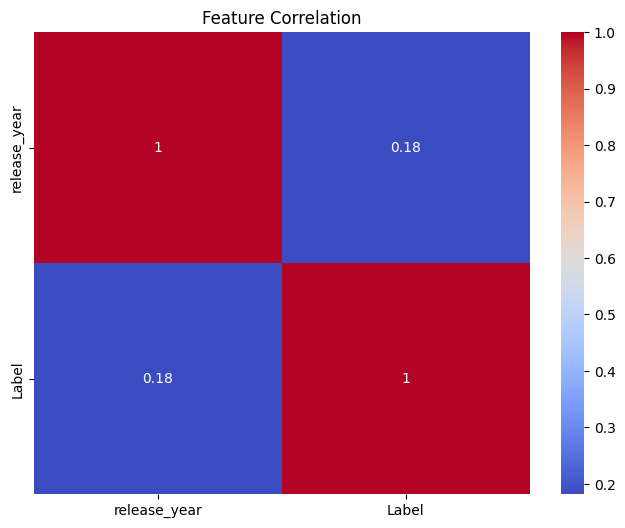

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
X = features_scaled
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6980703745743473
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1214
           1       0.56      0.14      0.22       548

    accuracy                           0.70      1762
   macro avg       0.63      0.54      0.52      1762
weighted avg       0.66      0.70      0.63      1762



In [18]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6980703745743473
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1214
           1       0.56      0.14      0.22       548

    accuracy                           0.70      1762
   macro avg       0.63      0.54      0.52      1762
weighted avg       0.66      0.70      0.63      1762



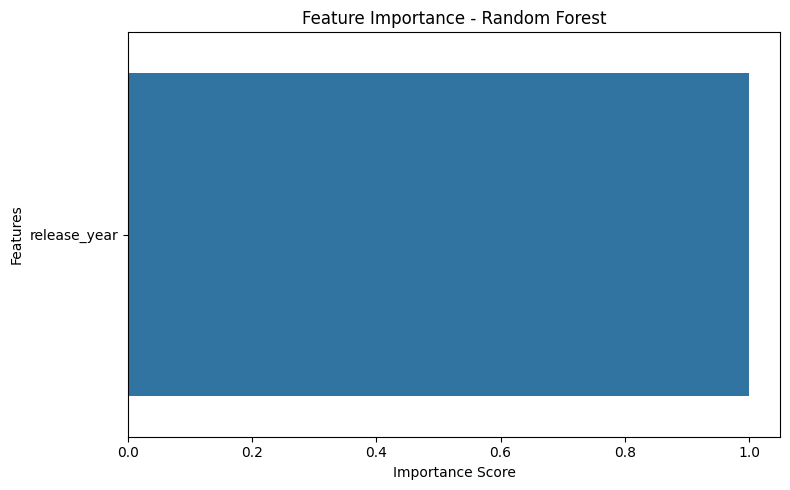

In [21]:
feature_importances = rf.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=features.columns)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()